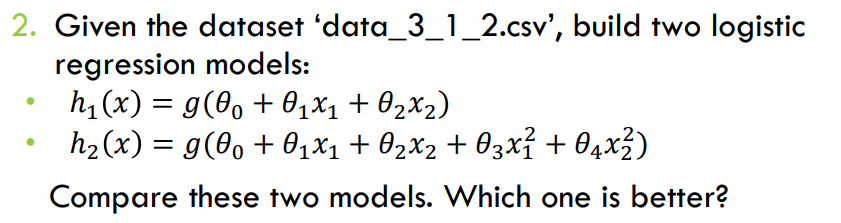

In [89]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [90]:
df = pd.read_csv('data_3_1_2.csv')
df

,x1,x2,class
0,9.076,3.721,0
1,6.809,3.930,0
2,8.256,2.851,1
3,8.461,3.145,1
4,6.783,3.188,1
...,...,...,...
195,7.411,3.344,1
196,8.476,3.323,1
197,5.143,2.509,0
198,6.595,2.765,1


In [91]:
df = df.to_numpy()
X = df[:,:-1]
y = df[:,-1]
print(X.shape)
print(y.shape)

(200, 2)
(200,)


In [92]:
X[:5]

array([[9.076, 3.721],
       [6.809, 3.93 ],
       [8.256, 2.851],
       [8.461, 3.145],
       [6.783, 3.188]])

In [93]:
def scale(X):
    return (X-X.mean(axis=0))/(X.max(axis=0)-X.min(axis=0))

X_scaled = scale(X=X)
X_scaled[:5]

array([[ 0.29906291,  0.35429722],
       [-0.12923862,  0.45629819],
       [ 0.14414132, -0.07030015],
       [ 0.18287172,  0.07318448],
       [-0.13415077,  0.09417033]])

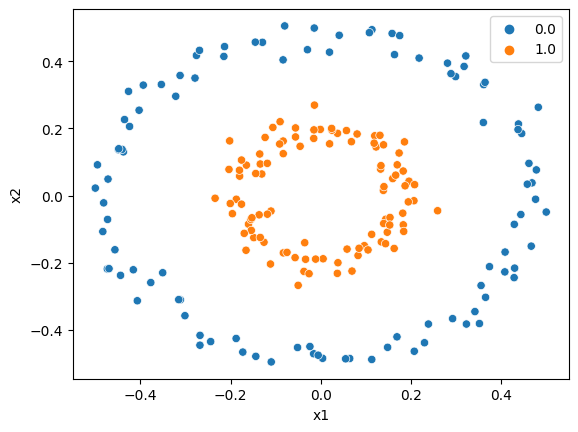

In [94]:
import seaborn as sns 
sns.scatterplot(x=X_scaled[:,0] , y=X_scaled[:,1],hue=y)
plt.xlabel(xlabel='x1')
plt.ylabel(ylabel='x2')
plt.show()

In [95]:
x0 = np.ones((len(X),1))
X_new = np.concatenate((x0,X_scaled),axis=1)
X_new[:5]

array([[ 1.        ,  0.29906291,  0.35429722],
       [ 1.        , -0.12923862,  0.45629819],
       [ 1.        ,  0.14414132, -0.07030015],
       [ 1.        ,  0.18287172,  0.07318448],
       [ 1.        , -0.13415077,  0.09417033]])

In [96]:
def hyp(x,theta):
    z = np.dot(x,theta)
    h = 1/(1+np.exp(-z))
    return h 
theta = np.zeros((3,1))
print(hyp(x=X_new,theta=theta))

[[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]

`Define cost function ask 3 argumens involving : x , theta , y`

In [97]:
def cost(x,theta,y):
    c = -y.reshape((-1,1)) * np.log(hyp(x=x,theta=theta)) - (1-y.reshape((-1,1))) * np.log(1-hyp(x=x,theta=theta))
    c = c.mean()
    return c 

cost(x=X_new,theta=theta,y=y)

0.6931471805599452

`Define gradient descending methos `

In [98]:
def gradient(x,theta,y):
    g = (hyp(x=x,theta=theta) - y.reshape((-1,1))) * x 
    g = 2 * (g.mean(axis=0))
    return g.reshape((-1,1))

gradient(x=X_new,theta=theta,y=y)

array([[ 0.        ],
       [-0.00401474],
       [-0.00193021]])

`Training data`

In [99]:
theta = np.zeros((3,1))
alpha = 10 

for i in range(100):
    cost_value = cost(x=X_new,theta=theta,y=y)
    theta += -alpha * gradient(x=X_new,theta=theta,y=y)
    print(cost_value)

0.6931471805599452
0.6930643093593878
0.6930270520799646
0.6930102969229784
0.6930027595743751
0.6929993679319572
0.6929978413897356
0.6929971541604624
0.6929968447328605
0.6929967056113646
0.6929966466301616
0.6929966789394888
0.6929976348765103
0.6930131163617176
0.6932606956835019
0.6972116627238084
0.7585649691311244
1.4468116997364238
3.0271384712305562
1.9708208682318002
2.8532829577986303
2.1298870778549914
2.7437784010123742
2.2289668857792004
2.668341041799753
2.2963452488628304
2.6144672633539683
2.343840740026097
2.575345393969146
2.3778893274614283
2.5467026657303546
2.4024932382752424
2.525644226640638
2.420329668158422
2.5101249677317425
2.4332644202386517
2.4986677682671226
2.4426282885305115
2.490193690047941
2.449382975143781
2.4839104325017014
2.45422858660378
2.4792349303799694
2.4576768573987593
2.475737904523341
2.4601026197953244
2.473103449145951
2.4617806824088446
2.4710993206038956
2.462912559858748
2.46955500593241
2.4636459795635086
2.4683455093406197
2.46408

In [100]:
for i in range (100):
    cost_value = cost(X_new, theta, y)
    theta += -alpha*gradient(X_new, theta, y)
    print(theta,'\n')

[[4.91111739]
 [2.3015157 ]
 [1.0893297 ]] 

[[-4.90961027]
 [ 2.31592405]
 [ 1.09614826]] 

[[4.91065021]
 [2.33051462]
 [1.10267829]] 

[[-4.90909503]
 [ 2.34448508]
 [ 1.10928982]] 

[[4.91018939]
 [2.35865275]
 [1.11560929]] 

[[-4.90858681]
 [ 2.37219391]
 [ 1.12201811]] 

[[4.90973528]
 [2.38594715]
 [1.1281314 ]] 

[[-4.90808594]
 [ 2.39906768]
 [ 1.13434186]] 

[[4.90928819]
 [2.41241501]
 [1.14025337]] 

[[-4.90759276]
 [ 2.42512362]
 [ 1.14626981]] 

[[4.90884839]
 [2.43807361]
 [1.15198396]] 

[[-4.90710757]
 [ 2.45037906]
 [ 1.15781076]] 

[[4.90841611]
 [2.46294031]
 [1.16333199]] 

[[-4.90663063]
 [ 2.47485138]
 [ 1.16897352]] 

[[4.90799158]
 [2.48703251]
 [1.17430627]] 

[[-4.9061622 ]
 [ 2.498558  ]
 [ 1.17976691]] 

[[4.90757499]
 [2.51036762]
 [1.18491562]] 

[[-4.90570247]
 [ 2.52151634]
 [ 1.19019974]] 

[[4.90716649]
 [2.53296306]
 [1.19516886]] 

[[-4.90525165]
 [ 2.54374381]
 [ 1.20028081]] 

[[4.90676623]
 [2.55483623]
 [1.20507476]] 

[[-4.9048099 ]
 [ 2.56525

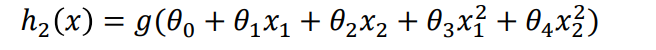

In [106]:
def hyp2(x, theta):
    z= np.matmul(x, theta) + np.matmul(x**2,theta)
    h= 1/(1+np.exp(-z))
    return h

theta = np.zeros((3,1))
hyp2(X_new, theta)

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
      

In [107]:
def cost2(x, theta, y):
    c = -y.reshape((-1,1))*np.log(hyp2(x,theta)) - (1-y.reshape((-1,1)))*np.log(1-hyp2(x,theta))
    c= c.mean()
    return c

print (cost2(X_new, theta, y))

0.6931471805599452


In [108]:
def gradient2(x, theta, y):
    g = (hyp2(x,theta) - y.reshape((-1,1))) * x
    g = 2 * (g.mean(axis = 0))
    return g.reshape((-1,1))

print(gradient2(X_new, theta, y))

[[ 0.        ]
 [-0.00401474]
 [-0.00193021]]


In [109]:
theta = np.zeros((3,1))
alpha = 10

for i in range (100):
    cost_value = cost2(X_new, theta, y)
    theta += -alpha*gradient2(X_new, theta, y)
    print(cost_value)

0.6931471805599452
0.6944934269603442
0.6955483420743057
0.7071171092521013
1.4011938746709278
7.368475815648903
2.6446165261403536
7.272288534074034
2.745118401619817
7.194299736556165
2.8276988598745776
7.128687168171041
2.8980612658246945
7.0720698717944845
2.9595271562498215
7.022296540763483
3.014214641394496
6.977907801232885
3.0635630260310016
6.937865382773696
3.108597705768422
6.901402804876556
3.15007650778326
6.86793723912356
3.188576220939802
6.8370146150097755
3.224546566040715
6.8082739155278515
3.258345342830121
6.781423106281609
3.29026215040682
6.756222410620683
3.3205348841313556
6.732472385605654
3.3493615069519707
6.710005229195725
3.376908637197965
6.688678318654625
3.4033179364005206
6.668369324438827
3.428710942548696
6.648972458657827
3.4531927829833573
6.630395555400255
3.4768550655607244
6.612557770289209
3.499778157559318
6.595387747924587
3.5220330018850414
6.578822147299438
3.5436825790681525
6.562804444383357
3.564783094907475
6.547283951559259
3.585384953

In [110]:
for i in range (100):
    cost_value = cost2(X_new, theta, y)
    theta += -alpha*gradient2(X_new, theta, y)
    print(theta,'\n')

[[5.93087462]
 [3.83577559]
 [1.84555997]] 

[[-4.06896877]
 [ 3.87589534]
 [ 1.86484578]] 

[[5.91316569]
 [3.91127368]
 [1.8820235 ]] 

[[-4.08667057]
 [ 3.9513918 ]
 [ 1.90130831]] 

[[5.89544813]
 [3.9866918 ]
 [1.91845374]] 

[[-4.10438064]
 [ 4.02680819]
 [ 1.93773748]] 

[[5.8777149 ]
 [4.06202917]
 [1.95485031]] 

[[-4.122106  ]
 [ 4.10214374]
 [ 1.97413292]] 

[[5.85995939]
 [4.13728505]
 [1.99121284]] 

[[-4.13985324]
 [ 4.17739771]
 [ 2.01049425]] 

[[5.84217539]
 [4.21245875]
 [2.02754097]] 

[[-4.15762854]
 [ 4.25256937]
 [ 2.04682112]] 

[[5.82435708]
 [4.28754956]
 [2.06383436]] 

[[-4.17543769]
 [ 4.32765802]
 [ 2.08311317]] 

[[5.80649901]
 [4.36255682]
 [2.10009267]] 

[[-4.19328612]
 [ 4.40266302]
 [ 2.11937005]] 

[[5.78859609]
 [4.43747992]
 [2.13631556]] 

[[-4.2111789 ]
 [ 4.47758371]
 [ 2.15559144]] 

[[5.77064356]
 [4.51231825]
 [2.17250272]] 

[[-4.22912075]
 [ 4.5524195 ]
 [ 2.191777  ]] 

[[5.752637  ]
 [4.58707125]
 [2.20865384]] 

[[-4.24711605]
 [ 4.62716

`Base on the testing and traing above, we observe that when the hypothesis function is the linear then the value of cost function and gradient descent are less than polynomial`.

`Therefore, the linear model is better than`